# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [95]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd



In [97]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [100]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [103]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [105]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [155]:
# Create an empty list
table_data = []


# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract all columns (inside <td> or <th> tags)
    cols = row.find_all(['td', 'th'])
    
    # Get the text content from each column
    data = [col.text.strip() for col in cols]
    
    # Add the row data to the list
    table_data.append(data)

for row in table_data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [157]:
print(table_data[0])

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [159]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
 # Assuming the first row contains column names (headers)
column_names = table_data[0]  
data = table_data[1:]   


# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=column_names)

In [161]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [164]:
# Examine data type of each column
df.dtypes

2             object
2012-08-16    object
10            object
155           object
6             object
-75.0         object
739.0         object
dtype: object

In [222]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [224]:
# Confirm type changes were successful by examining data types again
df.dtypes

2             object
2012-08-16    object
10            object
155           object
6             object
-75.0         object
739.0         object
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [227]:
# 1. How many months are there on Mars?
mars_weather_df['month'].nunique ()

12

In [229]:
# 2. How many sols (Martian days) worth of data are there?
mars_weather_df['sol'].nunique()

1867

In [231]:
# 3. What is the average minimum temperature by month?
avg_temp = mars_weather_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

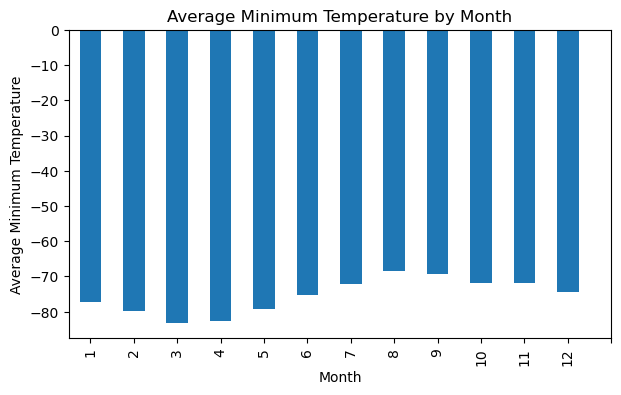

In [233]:
# Plot the average minimum temperature by month
# Plot the average minimum temperature by month
plt.figure(figsize=(7, 4))
avg_temp.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(range(0,13))  # Set x-ticks to be the month numbers
#plt.grid(axis='y')

# Show the plot
plt.show()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


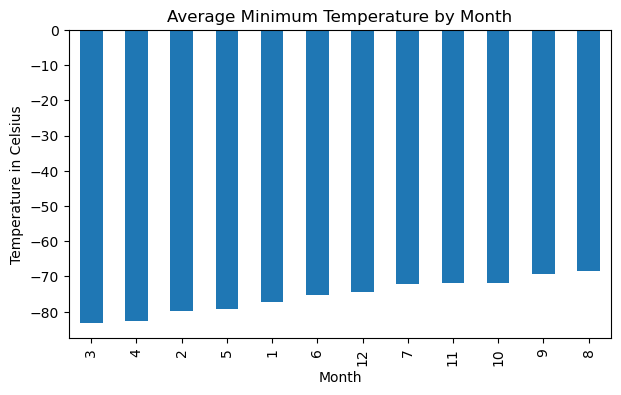

In [235]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_temp_sort = avg_temp.sort_values()
print(avg_temp_sort)

#plot
plt.figure(figsize=(7, 4))
avg_temp_sort.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(range(0,12))  # Set x-ticks to be the sorted month numbers
# plt.grid(axis='y')  # Optional grid
plt.show()

In [237]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

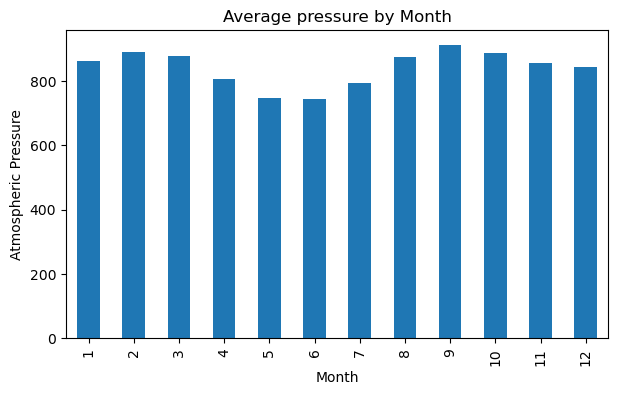

In [239]:
# Plot the average pressure by month
plt.figure(figsize=(7, 4))
avg_pressure.plot(kind='bar')
plt.title('Average pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(range(0,12))  # Set x-ticks to be the month numbers
#plt.grid(axis='y')

# Show the plot
plt.show()

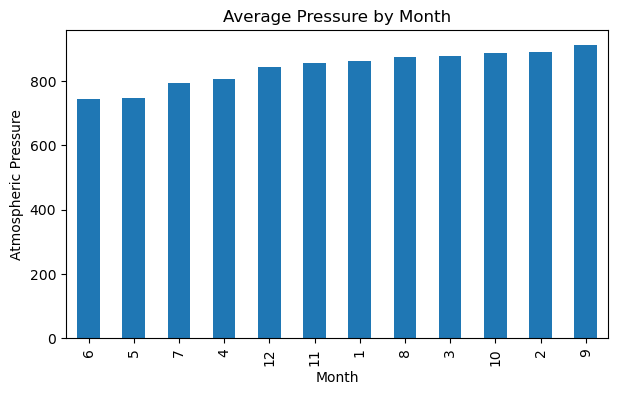

In [241]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sort = avg_pressure.sort_values()


#plot
plt.figure(figsize=(7, 4))
avg_pressure_sort.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(range(0,12))  # Set x-ticks to be the month numbers
plt.show()

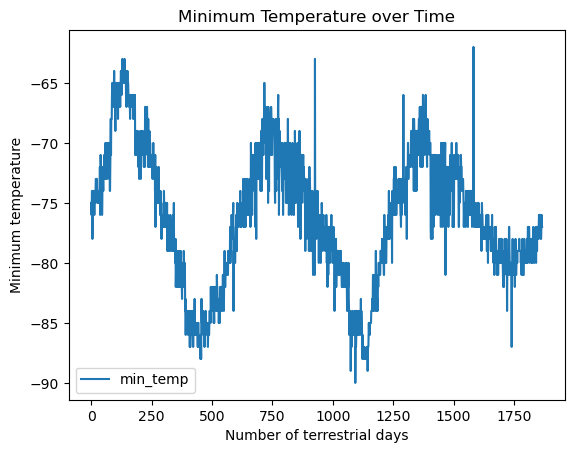

In [255]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df = mars_weather_df.sort_values('terrestrial_date')

# Calculate the number of days since the first date
mars_weather_df['days'] = (mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()).dt.days

#plt.figure(figsize=(8, 5))
mars_weather_df.plot(y='min_temp', kind='line')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')

plt.show()

#### Minimum Temperature

The minimum temperatures exhibits a seasonal pattern characteristic of the Southern Hemisphere, ranging from approximately -83.3°C in March (the coldest month) to -68.4°C in August (the warmest month). Winters are long, spanning February to October, while summers are brief and relatively mild. The extreme 80°C temperature variation and prolonged cold periods suggest a harsh, polar climate. This data points to a challenging environment, typical of Earth's southernmost regions.

#### Atmospheric Pressure

The atmospheric pressure varies seasonally, ranging from 750 to 900 units over the year. Winter months like December show higher pressures, while summer months, particularly June, show lower values. The highest pressure occurs in September, and the lowest in June, reflecting a clear seasonal pattern. This indicates dominant high-pressure systems in winter and low-pressure systems in summer, aligning with typical seasonal weather variations.

#### Year Length

Over approximately 2000 terrestrial days, we can see that minimum temperatures fluctuate dramatically, from -90°C at the lowest to around -60°C at the highest. Distinct warming and cooling cycles suggest a seasonal pattern. The sharp and frequent temperature shifts between -85°C and -65°C highlight the change of this environment, requiring the many living organisms to have to adapt to such conditions. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [260]:
# Write the data to a CSV
df.to_csv("mars_weather_data.csv", index=False)

In [ ]:
browser.quit()